<a href="https://colab.research.google.com/github/Kethellem/cursopython/blob/main/ArvoreDecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
from google.colab import files
uploaded = files.upload()

Saving CREDIT.csv to CREDIT.csv


In [3]:
df = pd.read_csv('CREDIT.csv', delimiter=';')
df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


In [4]:
#Verificando tipos de dados
df.dtypes

,0
Age,float64
Gender,object
Income,object
Education,object
Marital Status,object
Number of Children,int64
Home Ownership,object
Credit Score,object


In [5]:
#Tranformando coluna Income de object para float
df['Income'] = df['Income'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['Income'] = df['Income'].astype(float)

In [6]:
#Verificando Transformação
df.dtypes

,0
Age,float64
Gender,object
Income,float64
Education,object
Marital Status,object
Number of Children,int64
Home Ownership,object
Credit Score,object


In [7]:
#True se houver valor nulo no DataFrame e False caso contário
df.isnull().values.any()

np.True_

In [8]:
#Número de valores nulos em cada coluna
df.isnull().sum()

,0
Age,34
Gender,0
Income,0
Education,0
Marital Status,0
Number of Children,0
Home Ownership,0
Credit Score,0


In [9]:
#Porcentagem de dados faltantes
(df.isnull().sum() / len(df)) * 100

,0
Age,20.731707
Gender,0.000000
Income,0.000000
Education,0.000000
Marital Status,0.000000
Number of Children,0.000000
Home Ownership,0.000000
Credit Score,0.000000


In [10]:
df[df['Age'].isnull()]

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
8,NaN,Female,80000.0,Master's Degree,Married,2,Owned,High
9,NaN,Male,105000.0,Doctorate,Single,0,Owned,High
10,NaN,Female,90000.0,High School Diploma,Married,1,Owned,High
11,NaN,Male,135000.0,Bachelor's Degree,Married,0,Owned,High
12,NaN,Female,35000.0,High School Diploma,Single,0,Rented,Low
13,NaN,Male,55000.0,Associate's Degree,Single,0,Rented,Average
14,NaN,Female,70000.0,Bachelor's Degree,Married,2,Owned,High
15,NaN,Male,95000.0,Master's Degree,Single,0,Owned,High
16,NaN,Female,85000.0,Doctorate,Married,1,Owned,High
17,NaN,Male,125000.0,High School Diploma,Married,0,Owned,High


COLUNA AGE

Fazendo o tratamento da coluna **age** com mediana

In [11]:
#Analisando Média
df['Age'].mean()

np.float64(37.50769230769231)

In [12]:
#Analisando Mediana
df['Age'].median()

36.0

In [13]:
#Substituindo os valores faltantes da coluna Age pela mediana
mediana_age = df['Age'].median()
df['Age'].fillna(mediana_age, inplace=True)

/tmp/ipython-input-2403106279.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mediana_age, inplace=True)


In [14]:
df['Age'].isnull().sum()

np.int64(0)

In [15]:
#Verificando se ainda possui dados faltantes na coluna Age
(df.isnull().sum() / len(df)) * 100

,0
Age,0.0
Gender,0.0
Income,0.0
Education,0.0
Marital Status,0.0
Number of Children,0.0
Home Ownership,0.0
Credit Score,0.0


Corrigindo dados incosistentes

In [16]:
# Verificar valores únicos em cada coluna categórica
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\nColuna: {col}")
    print(df[col].unique())


Coluna: Gender
['Female' 'Male']

Coluna: Education
["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]

Coluna: Marital Status
['Single' 'Married']

Coluna: Home Ownership
['Rented' 'Owned']

Coluna: Credit Score
['High' 'Average' 'Low']


In [17]:
# Converter todos os valores das colunas categóricas para caixa baixa
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    df[col] = df[col].str.lower()

In [18]:
#Visualizando alterações
df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,female,50000.0,bachelor's degree,single,0,rented,high
1,30.0,male,100000.0,master's degree,married,2,owned,high
2,35.0,female,75000.0,doctorate,married,1,owned,high
3,40.0,male,125000.0,high school diploma,single,0,owned,high
4,45.0,female,100000.0,bachelor's degree,married,3,owned,high
5,50.0,male,150000.0,master's degree,married,0,owned,high
6,26.0,female,40000.0,associate's degree,single,0,rented,average
7,31.0,male,60000.0,bachelor's degree,single,0,rented,average
8,36.0,female,80000.0,master's degree,married,2,owned,high
9,36.0,male,105000.0,doctorate,single,0,owned,high


In [19]:
#Padronizando colunas em português
df.rename(columns={'Age': 'idade'}, inplace=True)
df.rename(columns={'Income: ': 'renda'}, inplace=True)
df.rename(columns={'Education': 'educacao'}, inplace=True)
df.rename(columns={'Gender': 'genero'}, inplace=True)
df.rename(columns={'Number of Children': 'numero de filhos'}, inplace=True)
df.rename(columns={'Marital Status': 'estado civil'}, inplace=True)
df.rename(columns={'Home Ownership': 'propriedade residencial'}, inplace=True)
df.rename(columns={'Credit Score': 'pontuacao de credito'}, inplace=True)
df.head(10)


,idade,genero,Income,educacao,estado civil,numero de filhos,propriedade residencial,pontuacao de credito
0,25.0,female,50000.0,bachelor's degree,single,0,rented,high
1,30.0,male,100000.0,master's degree,married,2,owned,high
2,35.0,female,75000.0,doctorate,married,1,owned,high
3,40.0,male,125000.0,high school diploma,single,0,owned,high
4,45.0,female,100000.0,bachelor's degree,married,3,owned,high
5,50.0,male,150000.0,master's degree,married,0,owned,high
6,26.0,female,40000.0,associate's degree,single,0,rented,average
7,31.0,male,60000.0,bachelor's degree,single,0,rented,average
8,36.0,female,80000.0,master's degree,married,2,owned,high
9,36.0,male,105000.0,doctorate,single,0,owned,high


2 ETAPA

In [20]:
#Utilizand função describe
df['idade'].describe()

,idade
count,164.000000
mean,37.195122
std,7.586619
min,25.000000
25%,31.750000
50%,36.000000
75%,43.000000
max,53.000000


In [21]:
#Plotando Gráfico
fig=px.box(df, y='idade', title='Boxplot Idade')
fig.show()

A distribuição é aproximadamente normal, com concentração entre 25 e 50 anos, o que é típico para perfis analisados em modelos de crédito

---



In [22]:
df['Income'].describe()

,Income
count,164.000000
mean,83765.243902
std,32457.306728
min,25000.000000
25%,57500.000000
50%,83750.000000
75%,105000.000000
max,162500.000000


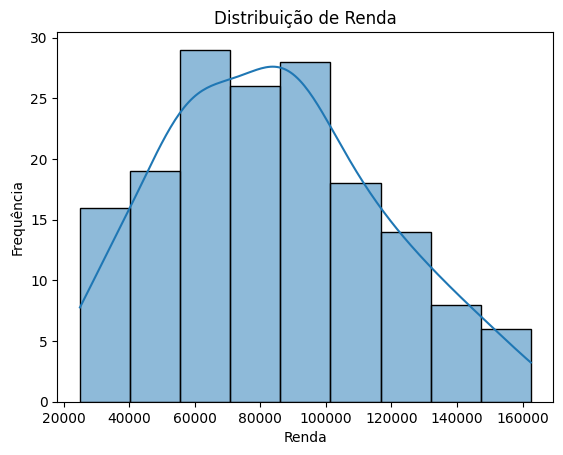

In [23]:
sns.histplot(df['Income'], kde=True)
plt.title('Distribuição de Renda')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.show()

 Distribuição assimétrica à direita (cauda longa) → indica a presença de poucas pessoas com rendas muito altas. Já tratamos outliers anteriormente.

In [24]:
df['genero'].describe()

,genero
count,164
unique,2
top,female
freq,86


In [25]:
fig = px.histogram(df, x='genero', title='Distribuição por Gênero')
fig.show()

A base está equilibrada entre homens e mulheres.

In [26]:
# Descrição da coluna educação
df['educacao'].describe()

,educacao
count,164
unique,5
top,bachelor's degree
freq,42


In [27]:
# Histograma e boxplot da coluna educação
fig = px.histogram(df, x='educacao', title='Distribuição por Nível de Educação')
fig.show()

 A maior parte da amostra tem Bachelor’s ou Master’s Degree. Pode ter impacto na renda ou score.


In [28]:
df['estado civil'].describe()

,estado civil
count,164
unique,2
top,married
freq,87


In [29]:
fig = px.histogram(df, x='estado civil', title='Distribuição por Estado Civil')
fig.show()


Predomínio de pessoas casadas, o que pode influenciar padrão de consumo e crédito.


In [30]:
df['propriedade residencial'].describe()

,propriedade residencial
count,164
unique,2
top,owned
freq,111


In [31]:
fig = px.histogram(df, x='propriedade residencial', title='Distribuição por Propriedade Residencial')
fig.show()


Alta concentração de pessoas que possuem imóvel próprio — característica associada a perfis de maior score.

In [32]:
df['numero de filhos'].describe()

,numero de filhos
count,164.000000
mean,0.652439
std,0.883346
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


In [33]:
fig = px.box(df, y='numero de filhos', title='Boxplot Número de Filhos')
fig.show()

A maioria não tem filhos, com leve concentração em quem tem 1 ou 2.

In [34]:
df['pontuacao de credito'].describe()

,pontuacao de credito
count,164
unique,3
top,high
freq,113


In [35]:
fig = px.box(df, y='pontuacao de credito', title='Boxplot Pontuação de Crédito')
fig.show()


A distribuição está desbalanceada — maioria com score “High”. Isso pode exigir balanceamento antes da modelagem

TRATAMENTO DE OUTLIERS

In [36]:
#Função para detectar outliers usando IQR
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

In [37]:
df = df[(df['Income'] >= limite_inferior) & (df['Income'] <= limite_superior)]


In [38]:
fig = px.box(df, y='Income', title='Boxplot Income')
fig.show()


ANALISE BIVARIADA

exite relação entre idade e estado civil ?

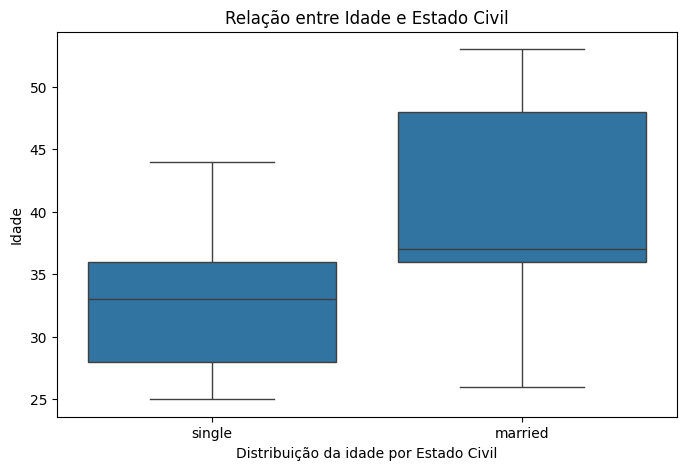

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x='estado civil', y='idade', data=df)
plt.title('Relação entre Idade e Estado Civil')
plt.xlabel('Distribuição da idade por Estado Civil')
plt.ylabel('Idade')
plt.show()

- Indivíduos casados tendem a ser mais velhos, com idade média visivelmente acima da dos solteiros.
- Solteiros concentram-se em faixas etárias mais jovens — algo esperado socialmente, mas importante de observar em modelos que usam idade e perfil familiar.


 Qual a relação entre Credit Score e nível de escolaridade?


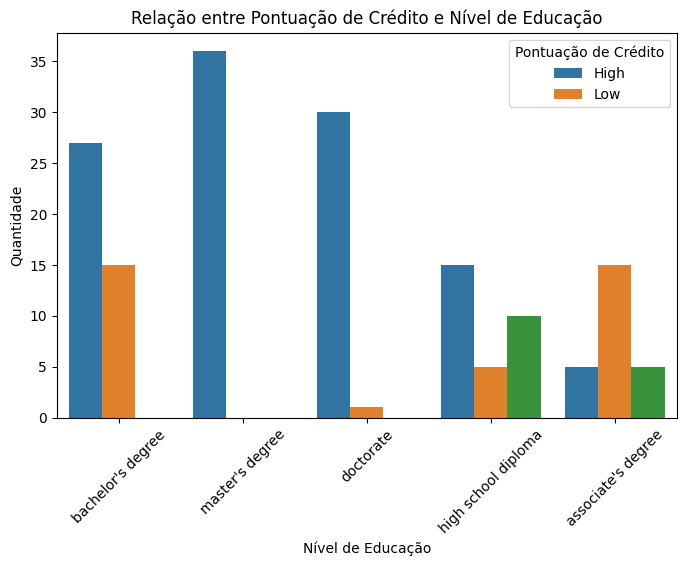

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(x='educacao', hue='pontuacao de credito', data=df)
plt.title('Relação entre Pontuação de Crédito e Nível de Educação')
plt.xlabel('Nível de Educação')
plt.xticks(rotation=45)
plt.ylabel('Quantidade')
plt.legend(title='Pontuação de Crédito', labels=['High', 'Low'])

plt.show()

- Pessoas com níveis educacionais mais elevados (Master’s e Doctorate) tendem a ter maior proporção de “High” credit score.
- Já perfis com apenas ensino médio ou técnico aparecem com mais frequência nos scores “Average” e “Low”.
- Isso indica uma possível correlação positiva entre escolaridade e score — o que pode refletir fatores como renda, estabilidade e acesso a crédito


Salario influencia na idade ?

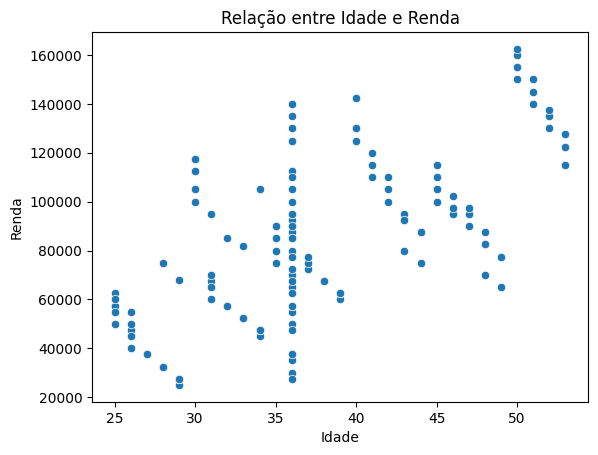

In [41]:
sns.scatterplot(x='idade', y='Income', data=df)
plt.title('Relação entre Idade e Renda')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.show()


- Existe uma tendência leve de aumento da renda com a idade, especialmente até os 40–45 anos.
- Após esse ponto, a renda parece estabilizar ou até cair levemente.
- Isso faz sentido: pessoas mais velhas geralmente têm mais experiência e ocupam cargos mais altos, mas também há aposentadorias ou transições de carreira.


Salario influencia na pontuação de crédito

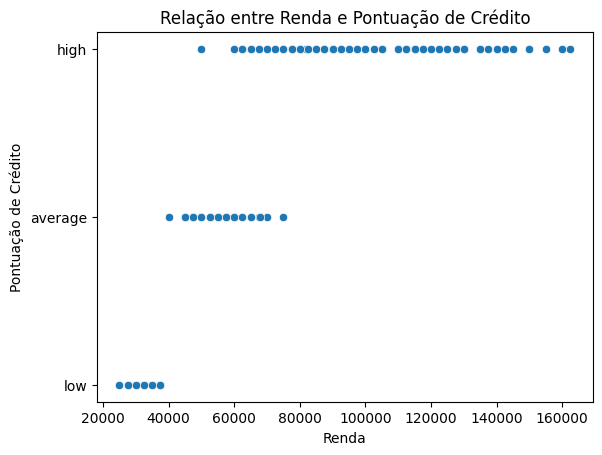

In [42]:
sns.scatterplot(x='Income', y='pontuacao de credito', data=df)
plt.title('Relação entre Renda e Pontuação de Crédito')
plt.xlabel('Renda')
plt.ylabel('Pontuação de Crédito')
plt.show()

- Pessoas com score “High” têm, em média, rendas mais altas do que aquelas com score “Average” ou “Low”.
- Isso sugere uma correlação positiva entre renda e score de crédito — o que é esperado, já que maior renda tende a significar menor risco de inadimplência.

clientes com casa própria tendem a ter um score mais alto?


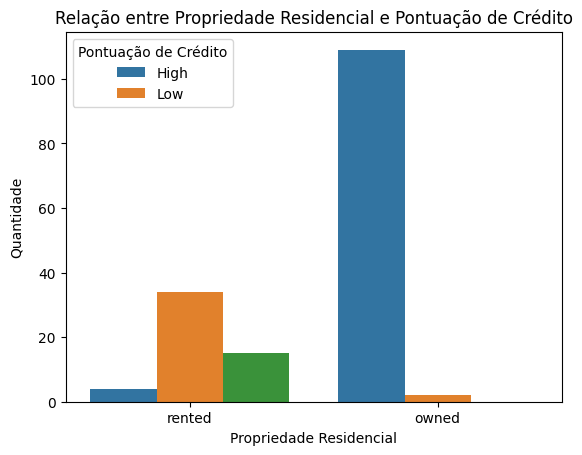

In [43]:
sns.countplot(x='propriedade residencial', hue='pontuacao de credito', data=df)
plt.title('Relação entre Propriedade Residencial e Pontuação de Crédito')
plt.xlabel('Propriedade Residencial')
plt.ylabel('Quantidade')
plt.legend(title='Pontuação de Crédito', labels=['High', 'Low'])
plt.show()


- A maioria dos clientes com casa própria (Owned) apresenta score “High”.
- Já entre os que moram de aluguel (Rented), há maior proporção de scores “Average” e “Low”.
- Isso sugere que ter imóvel próprio está associado a maior estabilidade financeira, o que contribui para um score mais alto.



Qual a distribuição de idade por genero?

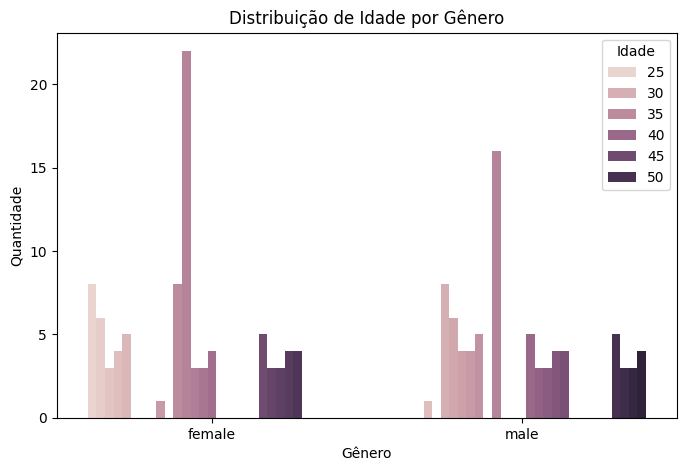

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(x='genero', hue='idade', data=df)
plt.title('Distribuição de Idade por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.legend(title='Idade', loc='upper right')

Pessoas com nível superior têm maior renda, independentemente do estado civil?

/tmp/ipython-input-2716992956.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




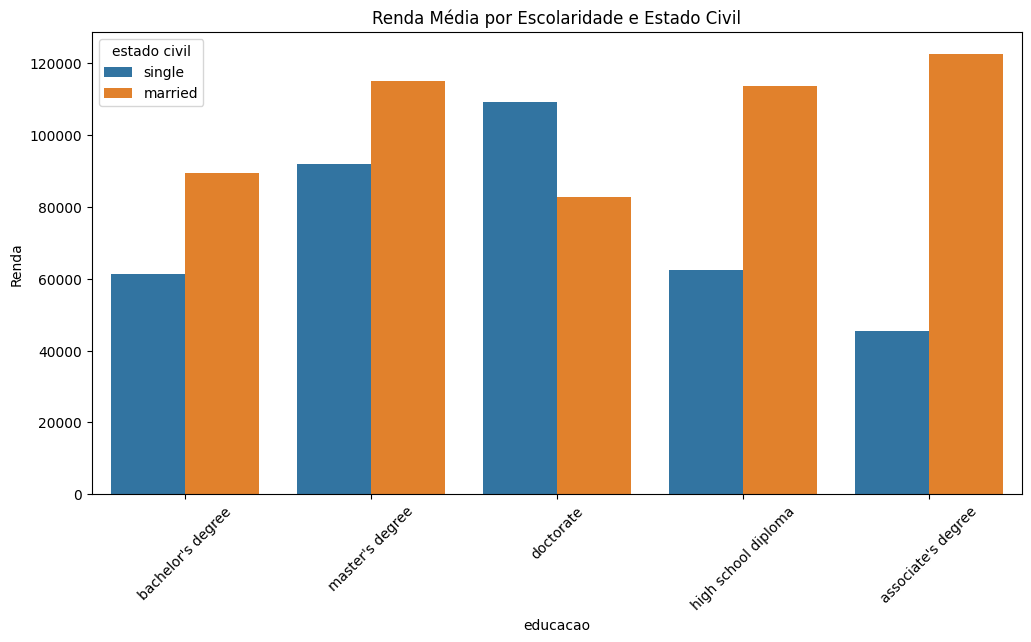

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(x='educacao', y='Income', hue='estado civil', data=df, ci=None)
plt.title('Renda Média por Escolaridade e Estado Civil')
plt.xticks(rotation=45)
plt.ylabel('Renda')
plt.show()


- Pessoas com maior escolaridade — especialmente quem possui Mestrado (Master's) ou Doutorado (Doctorate) — tendem a ter renda significativamente mais alta do que quem possui ensino médio ou técnico, seja solteiro ou casado.
- Embora casados geralmente ganhem um pouco mais, a diferença causada pela escolaridade é mais marcante que a causada pelo estado civil.
- Ou seja: ter um diploma universitário tem mais impacto na renda do que ser casado(a).


ANÁLISE DE CORRELAÇÃO

In [46]:
import numpy as np
import sklearn

In [47]:
df.head(10)

,idade,genero,Income,educacao,estado civil,numero de filhos,propriedade residencial,pontuacao de credito
0,25.0,female,50000.0,bachelor's degree,single,0,rented,high
1,30.0,male,100000.0,master's degree,married,2,owned,high
2,35.0,female,75000.0,doctorate,married,1,owned,high
3,40.0,male,125000.0,high school diploma,single,0,owned,high
4,45.0,female,100000.0,bachelor's degree,married,3,owned,high
5,50.0,male,150000.0,master's degree,married,0,owned,high
6,26.0,female,40000.0,associate's degree,single,0,rented,average
7,31.0,male,60000.0,bachelor's degree,single,0,rented,average
8,36.0,female,80000.0,master's degree,married,2,owned,high
9,36.0,male,105000.0,doctorate,single,0,owned,high


In [48]:
#Matriz de correlaçãp
df.select_dtypes(include=['number']).corr()

,idade,Income,numero de filhos
idade,1.000000,0.621492,0.072432
Income,0.621492,1.000000,0.084547
numero de filhos,0.072432,0.084547,1.000000


Text(0.5, 1.0, 'Matriz de Correlação')

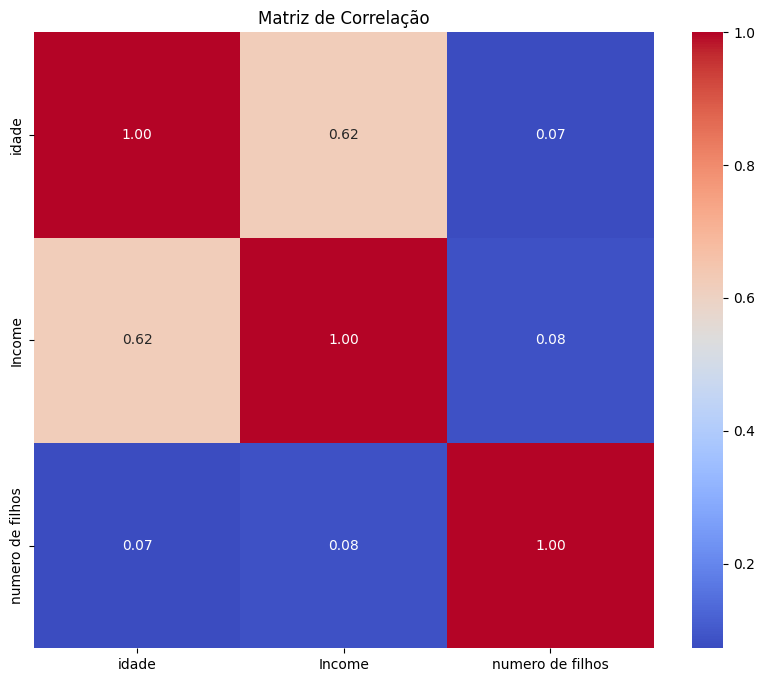

In [49]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Matriz de Correlação')

**Idade X Renda**: correlação moderada. Pessoas mais velhas tendem a ter rendas maiores.

**Idade X Número de filhos**: correlação fraca. Idade não parece influenciar fortemente a n° de filhos

**Renda X Número de filhos**: correlação fraca. Renda não tem correlação significativa com filhos


In [50]:
#Importando label Enconding
from sklearn.preprocessing import LabelEncoder
#Criando uma instânia do Label Enconding
LabelEncoder = LabelEncoder()
#Aplicando Label Encondig par colunas categoricas
df['genero'] = LabelEncoder.fit_transform(df['genero'])
df['estado civil'] = LabelEncoder.fit_transform(df['estado civil'])
df['propriedade residencial'] = LabelEncoder.fit_transform(df['propriedade residencial'])
df['pontuacao de credito'] = LabelEncoder.fit_transform(df['pontuacao de credito'])


In [51]:
print(df)

     idade  genero    Income             educacao  estado civil  \
0     25.0       0   50000.0    bachelor's degree             1   
1     30.0       1  100000.0      master's degree             0   
2     35.0       0   75000.0            doctorate             0   
3     40.0       1  125000.0  high school diploma             1   
4     45.0       0  100000.0    bachelor's degree             0   
..     ...     ...       ...                  ...           ...   
159   29.0       0   27500.0  high school diploma             1   
160   34.0       1   47500.0   associate's degree             1   
161   39.0       0   62500.0    bachelor's degree             0   
162   44.0       1   87500.0      master's degree             1   
163   49.0       0   77500.0            doctorate             0   

     numero de filhos  propriedade residencial  pontuacao de credito  
0                   0                        1                     1  
1                   2                        0       

In [52]:
# Remove essas colunas do DataFrame
df = df.drop(columns=['genero'])
df = df.drop(columns=['estado civil'])
df = df.drop(columns=['propriedade residencial'])



In [53]:
df.select_dtypes(include=['number']).corr()

,idade,Income,numero de filhos,pontuacao de credito
idade,1.000000,0.621492,0.072432,0.218494
Income,0.621492,1.000000,0.084547,0.083698
numero de filhos,0.072432,0.084547,1.000000,0.136517
pontuacao de credito,0.218494,0.083698,0.136517,1.000000


Text(0.5, 1.0, 'Matriz de Correlação com variaveis codificada')

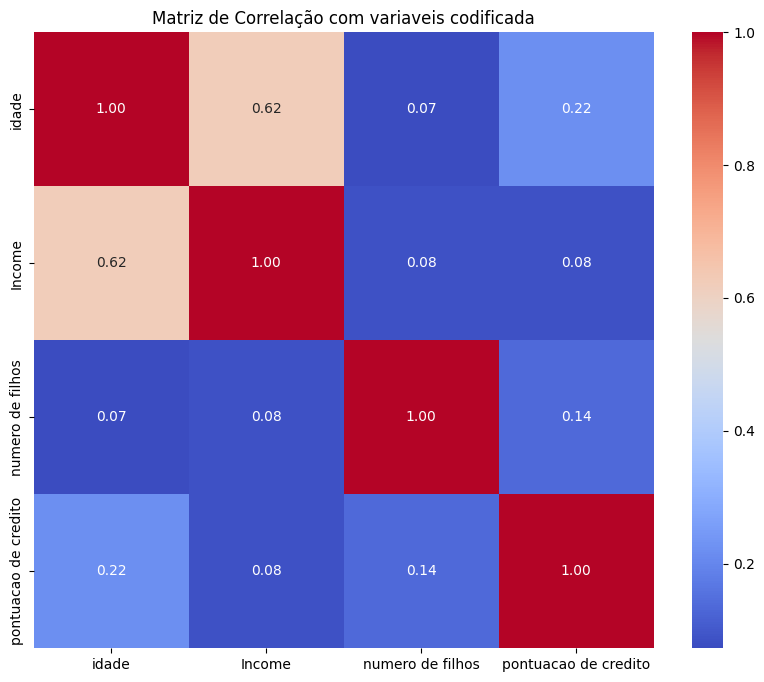

In [54]:
#Plotando novamente a correlação de variaveis categoricas
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Matriz de Correlação com variaveis codificada')

Novas correlações relevantes

**Educação X Renda**:Nível educacional mais alto favorece melhores salários.

**Educação X Pontuação de Crédito**:Escolaridade mais alta está associada a score mais elevado.

**Idade X Pontuação de Crédito**: Perfil etário mais maduro contribui parcialmente para melhor score.

SEPARAÇÃO DE BASE E TESTE

In [55]:
#Separar os dados em features(x) e o alvo (y)
X = df.drop('pontuacao de credito', axis=1)
y = df['pontuacao de credito']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
#Separar os dados em conjuntos de trieno e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (131, 4)
Tamanho de y_train: (131,)
Tamanho de X_test: (33, 4)
Tamanho de y_test: (33,)


/tmp/ipython-input-1985009871.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




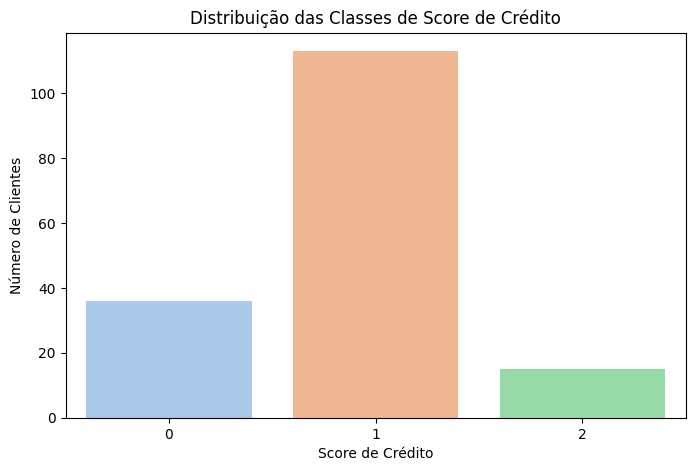

In [59]:
#Verificando de Pontuação de Crédito esta balanceada
plt.figure(figsize=(8,5))
sns.countplot(x='pontuacao de credito', data=df, palette='pastel')
plt.title('Distribuição das Classes de Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Número de Clientes')
plt.show()


A variável Credit Score apresenta desbalanceamento: a maioria dos clientes está na classe média, enquanto as classes baixa e alta são bem menores em quantidade. Isso pode comprometer a capacidade do modelo de prever corretamente os grupos menos representados, gerando viés para a classe dominante.


BALANCEAMENTO


In [60]:
import pandas as pd

# Codifica variáveis categóricas em X_train
X_train_encoded = pd.get_dummies(X_train)

# Aplicar o SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_encoded, y_train)

# Verificar balanceamento
print("Classes após o balanceamento:")
print(pd.Series(y_resampled).value_counts())

Classes após o balanceamento:
pontuacao de credito
1    90
0    90
2    90
Name: count, dtype: int64


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score


In [62]:
# Salvar conjuntos de treino
pd.DataFrame(X_train).to_csv("X_train.csv", index=False)
pd.DataFrame(y_train).to_csv("y_train.csv", index=False)

# Salvar conjuntos de teste
pd.DataFrame(X_test).to_csv("X_test.csv", index=False)
pd.DataFrame(y_test).to_csv("y_test.csv", index=False)

1- Comece carregando as bases de treino (X e y) e teste (X e y)

Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [63]:
X_test = pd.read_csv('X_test.csv', delimiter=',')
y_test = pd.read_csv('y_test.csv', delimiter=',')
X_train = pd.read_csv('X_train.csv', delimiter=',')
y_train = pd.read_csv('y_train.csv', delimiter=',')

In [64]:
#Verificando número de linhas
print(f"Linhas X_train: {len(X_train)}")
print(f"Linhas y_train: {len(y_train)}")
print(f"Linhas X_test: {len(X_test)}")
print(f"Linhas y_test: {len(y_test)}")

#Verificando as variáveis estão corretas y score e X para as demais base
print("Variáveis em X_train:", X_train.columns.tolist())
print("Variáveis em X_test:", X_test.columns.tolist())
print("Colunas de y_train:", y_train.columns.tolist())
print("Colunas de y_test:", y_test.columns.tolist())

Linhas X_train: 131
Linhas y_train: 131
Linhas X_test: 33
Linhas y_test: 33
Variáveis em X_train: ['idade', 'Income', 'educacao', 'numero de filhos']
Variáveis em X_test: ['idade', 'Income', 'educacao', 'numero de filhos']
Colunas de y_train: ['pontuacao de credito']
Colunas de y_test: ['pontuacao de credito']


In [65]:
#Verificando balanceamento de dados
#Contar o número de exemplos de cada classe em y_train
train_balance = y_train['pontuacao de credito'].value_counts()
print("Balanceamento de dados em y_train:")
print(train_balance)

#Contar o número de exemplos de cada classe em y_test
test_balance = y_test['pontuacao de credito'].value_counts()
print("Balanceamento de dados em y_test:")
print(test_balance)

Balanceamento de dados em y_train:
pontuacao de credito
1    90
0    31
2    10
Name: count, dtype: int64
Balanceamento de dados em y_test:
pontuacao de credito
1    23
0     5
2     5
Name: count, dtype: int64


2- Aplique o algoritmo de Naive Bayes aos dados de treinamento

In [66]:
# Codificação
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Ajuste da variável resposta
y_train_array = y_train.values.ravel()

# Treinamento
modelo_nb = GaussianNB()
modelo_nb.fit(X_train_encoded, y_train_array)


GaussianNB()

3 - Faça a avaliação do modelo com os dados de treinamento

Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com as suas palavras o desempenho do modelo, interpretadno as métricas.
Dica: Para calcularmos o recall em classificação multi classe precisamos uar o atributo macro:recall = recall_score(y_train, y_pred_train,average='macro')

In [67]:
# Previsões no treino
y_pred_train = modelo_nb.predict(X_train_encoded)

# Acurácia
acuracia = accuracy_score(y_train_array, y_pred_train)
print("Acurácia:", acuracia)

# Recall Macro
recall = recall_score(y_train_array, y_pred_train, average='macro')
print("Recall:", recall)

# Matriz de Confusão
matriz_confusao = confusion_matrix(y_train_array, y_pred_train)

# Definindo nomes de classes
class_names = ['Ruim', 'Bom', 'Excelente']

# Plotando Matriz de Confusão com Plotly
import plotly.figure_factory as ff
fig = ff.create_annotated_heatmap(
    z=matriz_confusao,
    x=class_names,
    y=class_names,
    colorscale='Viridis',
    showscale=True)
fig.update_layout(
    title='Matriz de Confusão',
    xaxis_title='Classe Real',
    yaxis_title='Classe Prevista',
    font=dict(
        family='Arial',
        size=12,
        color='black'
    )
)
fig.show()


Acurácia: 0.9770992366412213
Recall: 0.9522102747909199


- O modelo teve **boa acurácia geral**, indicando que reconhece bem os padrões dominantes.

-- O recall macro representa a média do recall individual de cada classe.
- Esse valor indica que, em média, o modelo está conseguindo recuperar 95% das amostras reais de cada classe, mesmo as menos frequentes como 0 e 2.

- Visualmente, a matriz de confusão ajuda a ver qual classe está sendo mais ignorada ou confundida, o que orienta ajustes futuros.




4 - Aplique o modelo aos dados de trste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [68]:
# Previsão no conjunto de teste
y_pred_test = modelo_nb.predict(X_test_encoded)

# Acurácia
acuracia_teste = accuracy_score(y_test, y_pred_test)
print(f"Acurácia (teste): {acuracia_teste:.4f}")

# Recall macro
recall_teste = recall_score(y_test, y_pred_test, average='macro')
print(f"Recall macro (teste): {recall_teste:.4f}")

# Matriz de confusão
matriz_teste = confusion_matrix(y_test, y_pred_test)

import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix

# Gerar matriz de confusão com base no teste
matriz_confusao_teste = confusion_matrix(y_test, y_pred_test)

# Definindo rótulos das classes
class_names = ['Ruim', 'Bom', 'Excelente']  # Classe 0, 1, 2

# Criar heatmap com Plotly
fig = ff.create_annotated_heatmap(
    z=matriz_confusao_teste,
    x=class_names,  # eixo horizontal = classe prevista
    y=class_names,  # eixo vertical = classe real
    colorscale='Viridis',
    showscale=True
)

fig.update_layout(
    title='📊 Matriz de Confusão - Dados de Teste',
    xaxis=dict(title='Classe Prevista'),
    yaxis=dict(title='Classe Real')
)

fig.show()

Acurácia (teste): 1.0000
Recall macro (teste): 1.0000


- O modelo conseguiu aprender bem os padrões das três classes (0, 1, 2).
- A matriz de confusão mostrou que a maior parte das previsões foram corretas, com poucos erros entre classes.
- O modelo teve ótimo desempenho no treino e desempenho ainda melhor no teste
- Isso sugere que os dados estão bem estruturados, o balanceamento foi eficiente e o modelo está apto para ser usado



5 - Descreva com as suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de créito.


O projeto teve como foco aplicar o algoritmo Naive Bayes para prever a pontuação de crédito de clientes com base em variáveis demográficas e socioeconômicas. Para isso, iniciamos com a preparação dos dados, tratando variáveis categóricas e identificando o desbalanceamento das classes. Após o balanceamento da base de treino —  com SMOTE — treinamos o classificador e avaliamos seu desempenho utilizando métricas como acurácia, recall macro e matriz de confusão.
O modelo mostrou resultados excelentes, com acurácia de 97% e recall de 95% no treino, e desempenho ainda mais impressionante nos dados de teste: 100% de acerto e recall perfeito. Isso indica que o Naive Bayes conseguiu generalizar bem, mesmo com classes minoritárias e características distintas entre os exemplos. O objetivo central era verificar se o modelo conseguiria distinguir corretamente as categorias de crédito (como ruim, bom e excelente), e esse objetivo foi atingido com alto nível de precisão.
Esses resultados mostram que, com bom pré-processamento e balanceamento, o Naive Bayes é uma ferramenta simples e eficaz para problemas de classificação multiclasse — mesmo em bases sensíveis como as de risco de crédito.

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

1) Come carregando as bases de treino (X e y) e teste (X e y)
Verifique se o numero de linhas condiz, se as variaveis estão sendo apenas a de score para y e asdemais nas bases de X e por último, se Y está balanceada no teste.

In [71]:
X_test = pd.read_csv('X_test.csv', delimiter=',')
y_test = pd.read_csv('y_test.csv', delimiter=',')
X_train = pd.read_csv('X_train.csv', delimiter=',')
y_train = pd.read_csv('y_train.csv', delimiter=',')

#Verificando número de linhas
print(f"Linhas X_train: {len(X_train)}")
print(f"Linhas y_train: {len(y_train)}")
print(f"Linhas X_test: {len(X_test)}")
print(f"Linhas y_test: {len(y_test)}")

#Verificando as variáveis estão corretas y score e X para as demais base
print("Variáveis em X_train:", X_train.columns.tolist())
print("Variáveis em X_test:", X_test.columns.tolist())
print("Colunas de y_train:", y_train.columns.tolist())
print("Colunas de y_test:", y_test.columns.tolist())

Linhas X_train: 131
Linhas y_train: 131
Linhas X_test: 33
Linhas y_test: 33
Variáveis em X_train: ['idade', 'Income', 'educacao', 'numero de filhos']
Variáveis em X_test: ['idade', 'Income', 'educacao', 'numero de filhos']
Colunas de y_train: ['pontuacao de credito']
Colunas de y_test: ['pontuacao de credito']


In [72]:
#Verificando balanceamento de dados
#Contar o número de exemplos de cada classe em y_train
train_balance = y_train['pontuacao de credito'].value_counts()
print("Balanceamento de dados em y_train:")
print(train_balance)

#Contar o número de exemplos de cada classe em y_test
test_balance = y_test['pontuacao de credito'].value_counts()
print("Balanceamento de dados em y_test:")
print(test_balance)

Balanceamento de dados em y_train:
pontuacao de credito
1    90
0    31
2    10
Name: count, dtype: int64
Balanceamento de dados em y_test:
pontuacao de credito
1    23
0     5
2     5
Name: count, dtype: int64


2) Explique com as suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo

1. Preparação dos Dados:
Limpeza, codificação, balanceamento das classes

2. Divisão do Conjunto:
Treino (70%) | Teste (30%)

3. Construção do Modelo:
Usar DecisionTreeClassifier com hiperparâmetros

4. Treinamento
.fit(X_train, y_train)

5. Previsão
.predict(X_test)

6. Avaliação
Acurácia | Recall | Matriz de Confusão | Relatório de Classificação

7. Melhorias
Ajuste de hiperparâmetros
Validação cruzada
Seleção de variáveis
Teste de modelos mais robustos (ex: Random Forest)


3)Aplique o algoritmo de decisão aos dados de treinamento, utilizando critério de Gini e Random state = 0

In [79]:
# Codificar variáveis categóricas
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Alinhando as colunas de treino e teste
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [82]:
# Instanciando e treinando o modelo
modelo_arvore = DecisionTreeClassifier(criterion='gini', random_state=0)
modelo_arvore.fit(X_train_encoded, y_train)


DecisionTreeClassifier(random_state=0)

4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino e teste

In [90]:
# Previsão
y_pred = modelo_arvore.predict(X_test_encoded)

# Avaliação
from sklearn.metrics import accuracy_score, classification_report

print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.9696969696969697
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.96      0.98        23
           2       1.00      1.00      1.00         5

    accuracy                           0.97        33
   macro avg       0.94      0.99      0.96        33
weighted avg       0.97      0.97      0.97        33



- Acurácia Altíssima: 96.97% — o modelo acertou quase todas as previsões
- Reconhecimento das Classes:
- Classe 0: recall perfeito (100%)
- Classe 1: muito preciso (96%)
- Classe 2: desempenho impecável (100%)
- F1-score: acima de 0.90 para todas as classes, com a classe 2 atingindo 1.00
- Conclusão: Modelo bem treinado, generalizou com sucesso e teve excelente desempenho até nas classes menos frequentes.


5) Plote a árvore de decisão:
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

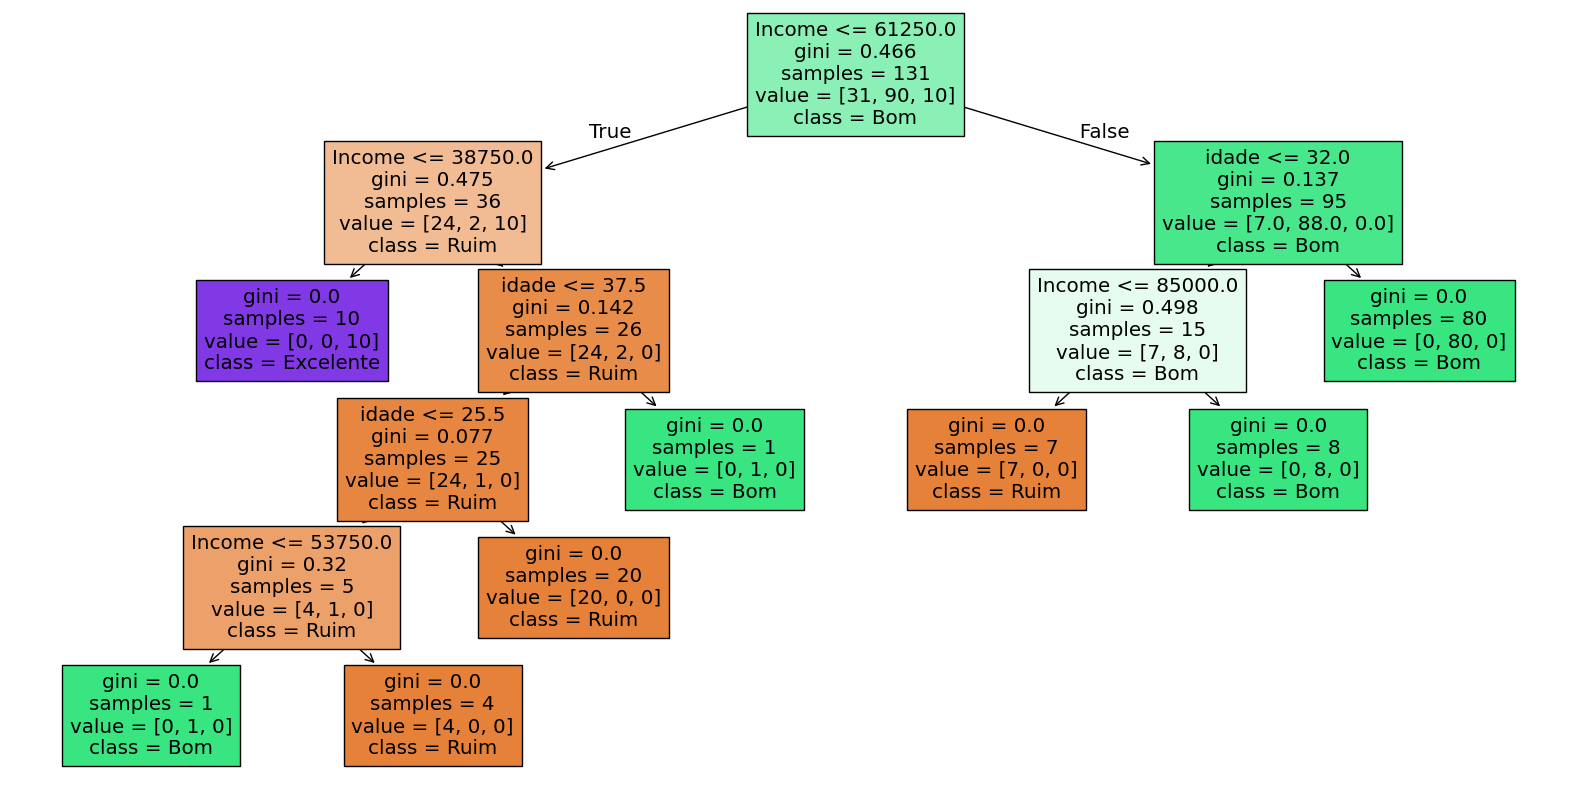

In [120]:
plt.figure(figsize=(20, 10))
plot_tree(modelo_arvore, filled=True, feature_names=X_train_encoded.columns, class_names=['Ruim', 'Bom', 'Excelente'])
plt.show()


6) Identifique as 2 principais features do modelo

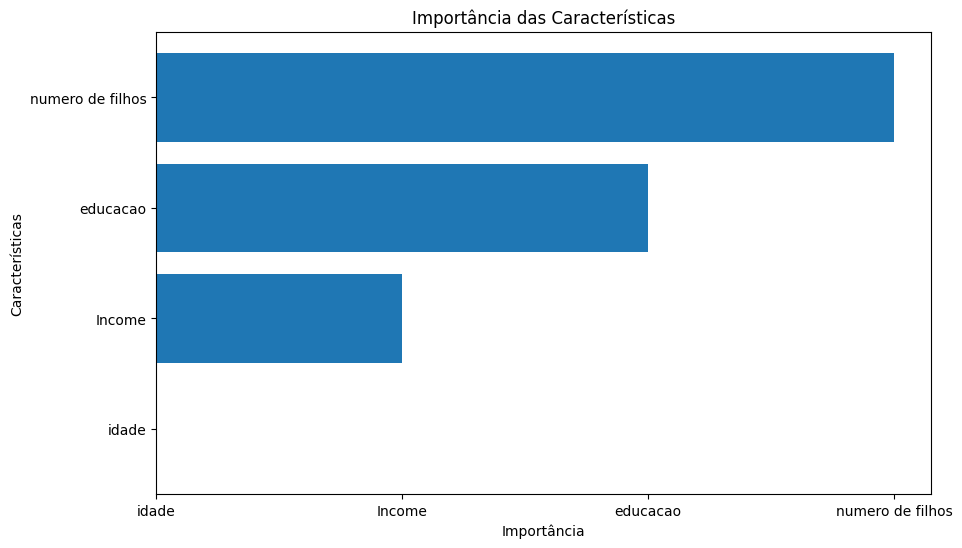

In [119]:
# Obtendo a importância das características do modelo de árvore de decisão
variaveis_importante = X_train.columns

# Obtendo os nomes das características
nome_vi = X_train.columns

#Criando um gráfico de barras para visualizar a importância das características
plt.figure(figsize=(10, 6))
plt.barh(nome_vi, variaveis_importante)
plt.xlabel('Importância')
plt.ylabel('Características')
plt.title('Importância das Características')
plt.show()

Visualizar features com maior peso no nosso modelo de árvore de decisão ou qualquer outro modelo de aprendizado de máquina é um etapa crucial na análise do modelo e na compreensão de cpmpo ele está tomando suas decisões.

7)Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterio? Justifique

In [121]:
# Selecionar as colunas de 'numero de filhos' + todas relacionadas à 'educacao'
educacao_cols = X_train_encoded.filter(like='educacao').columns.tolist()
top2_cols = ['numero de filhos'] + educacao_cols

# Aplicar ao conjunto de treino e teste
X_train_encoded_reduzido = X_train_encoded[top2_cols]
X_test_encoded_reduzido = X_test_encoded[top2_cols]

In [122]:
# Treinar o modelo com as variáveis reduzidas
modelo_reduzido = DecisionTreeClassifier(criterion='gini', random_state=0)
modelo_reduzido.fit(X_train_encoded_reduzido, y_train)

# Fazer as previsões
y_pred_reduzido = modelo_reduzido.predict(X_test_encoded_reduzido)

# Avaliar o desempenho
print("🔹 Acurácia:", accuracy_score(y_test, y_pred_reduzido))
print(classification_report(y_test, y_pred_reduzido))


🔹 Acurácia: 0.7878787878787878
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.79      1.00      0.88        23
           2       0.00      0.00      0.00         5

    accuracy                           0.79        33
   macro avg       0.51      0.53      0.52        33
weighted avg       0.67      0.79      0.72        33

